In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

## Problem 1

### iris

In [2]:
iris = data("iris")
iris.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
13,4.8,3.0,1.4,0.1,setosa
63,6.0,2.2,4.0,1.0,versicolor
20,5.1,3.8,1.5,0.3,setosa
97,5.7,2.9,4.2,1.3,versicolor
52,6.4,3.2,4.5,1.5,versicolor


In [3]:
species = iris.groupby("Species")
species.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


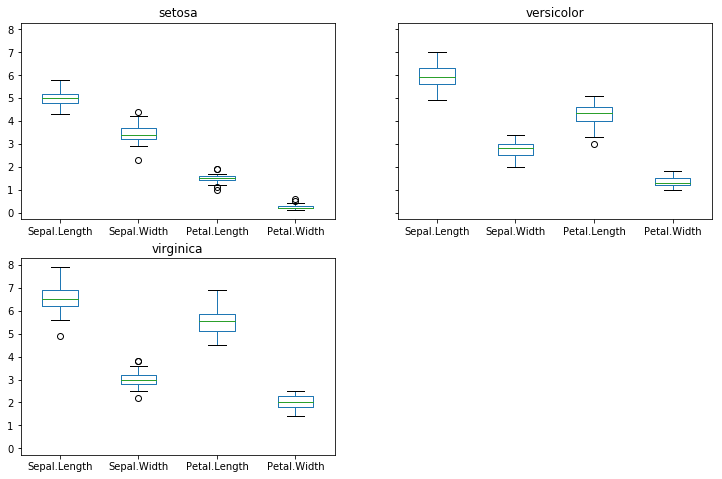

In [4]:
species.boxplot(grid=False, figsize=(12,8))
plt.show()

### poisons

In [5]:
poisons = data("poisons")
poisons.sample(5)

,time,poison,treat
15,0.88,1,B
32,0.40,2,C
39,0.66,1,D
37,0.45,1,D
38,0.71,1,D


In [6]:
poison_treat = poisons.groupby(["poison", "treat"])
poison_treat.mean()

time
poison treat        
1      A      0.4125
       B      0.8800
       C      0.5675
       D      0.6100
2      A      0.3200
       B      0.8150
       C      0.3750
       D      0.6675
3      A      0.2100
       B      0.3350
       C      0.2350
       D      0.3250

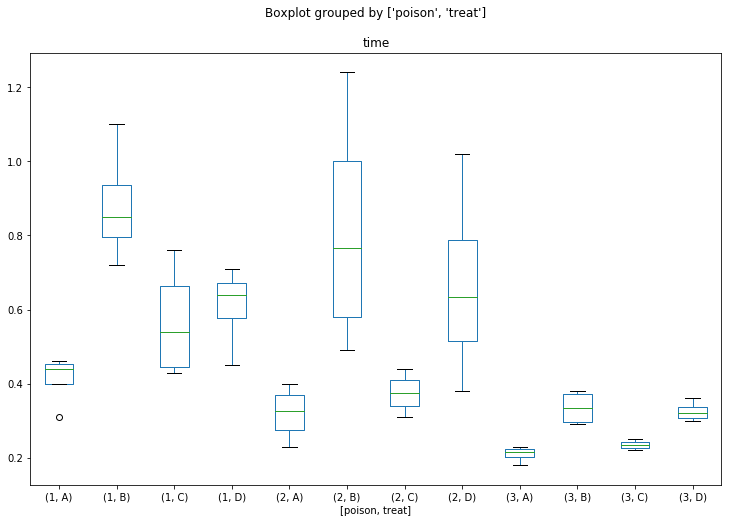

In [7]:
poisons.boxplot(["time"], by=["poison","treat"], grid=False, figsize=(12,8))
plt.show()

### diamonds

In [8]:
diamonds = data("diamonds")
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
9094,1.20,Premium,G,SI2,61.8,60.0,4524,6.85,6.78,4.21
41941,0.29,Very Good,D,VS1,62.9,55.0,504,4.21,4.25,2.66
24984,2.07,Very Good,J,VS2,61.3,56.0,13495,8.16,8.20,5.02
12989,1.00,Premium,E,SI1,61.7,58.0,5396,6.42,6.35,3.94
11872,1.20,Premium,J,VS1,59.1,61.0,5107,7.00,6.94,4.12


In [9]:
color = diamonds.groupby(["color"])
color["price"].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.0,3169.954096,3356.590935,357.0,911.0,1838.0,4213.50,18693.0
E,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
F,9542.0,3724.886397,3784.992007,342.0,982.0,2343.5,4868.25,18791.0
G,11292.0,3999.135671,4051.102846,354.0,931.0,2242.0,6048.00,18818.0
H,8304.0,4486.669196,4215.944171,337.0,984.0,3460.0,5980.25,18803.0
I,5422.0,5091.874954,4722.387604,334.0,1120.5,3730.0,7201.75,18823.0
J,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0


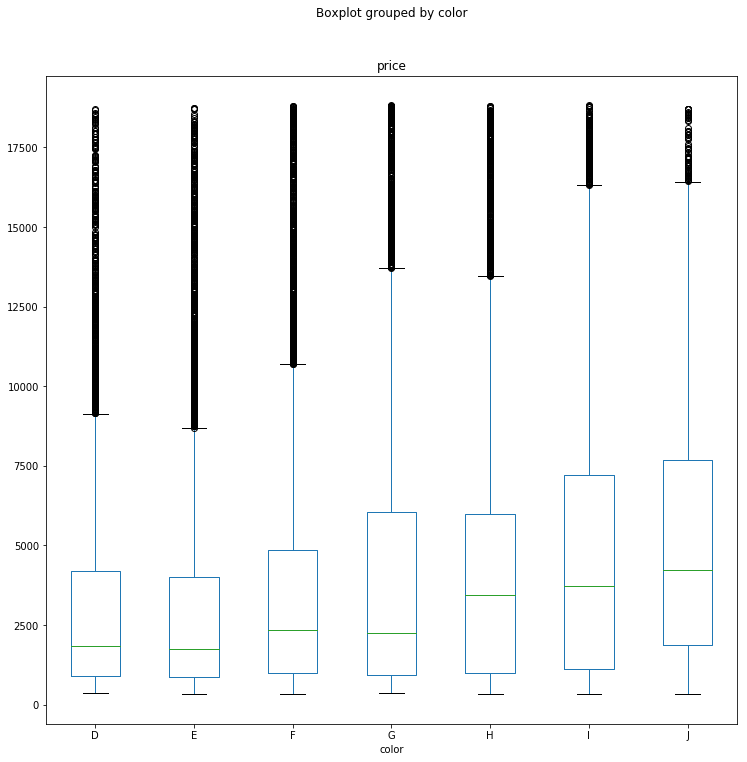

In [10]:
diamonds.boxplot(["price"], grid=False, by='color',figsize=(12,12))
plt.show()

In [11]:
cut = diamonds.groupby(["cut"])
cut["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


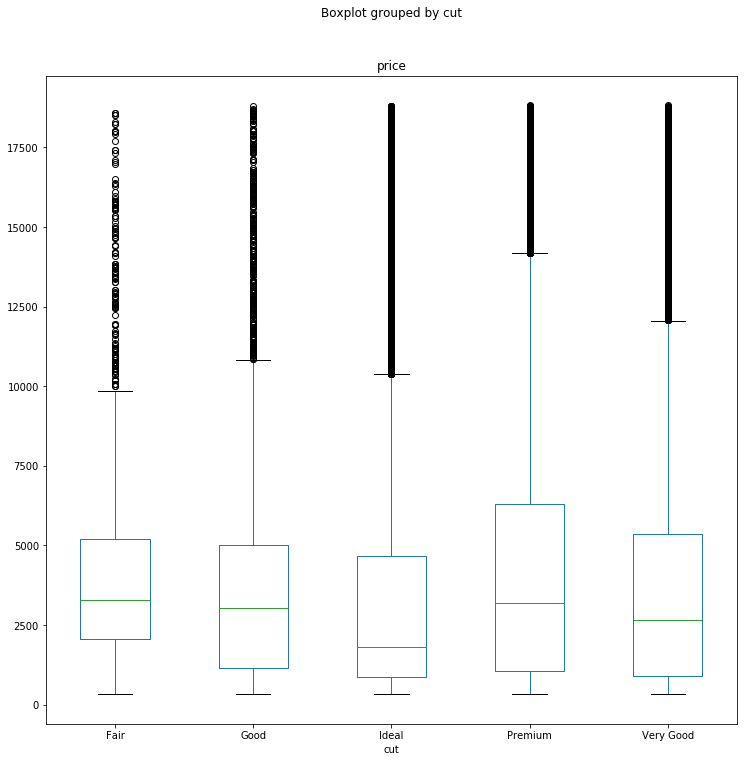

In [12]:
diamonds.boxplot(["price"], grid=False, by='cut',figsize=(12,12))
plt.show()

In [13]:
color_cut = diamonds.groupby(["color", "cut"])

In [14]:
color_cut.get_group(("H", "Fair")).mean()

carat       1.219175
depth      64.585149
table      58.696370
price    5135.683168
x           6.579373
y           6.497393
z           4.219373
dtype: float64

In [15]:
color_cut.get_group(("H", "Ideal")).mean()

carat       0.799525
depth      61.733194
table      55.965843
price    3889.334831
x           5.731377
y           5.740446
z           3.539917
dtype: float64

Notice that "H" and "Fair" has a larger carat than "H" and "Ideal" on average.

## Problem 2

In [16]:
titanic = pd.read_csv("titanic.csv")

In [17]:
titanic.sample(5)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
425,2.0,0.0,"Greenberg, Mr. Samuel",male,52.0,0.0,0.0,250647,13.0000,NaN,S,NaN,19.0,"Bronx, NY"
493,2.0,0.0,"Mallet, Mr. Albert",male,31.0,1.0,1.0,S.C./PARIS 2079,37.0042,NaN,C,NaN,NaN,"Paris / Montreal, PQ"
454,2.0,1.0,"Hosono, Mr. Masabumi",male,42.0,0.0,0.0,237798,13.0000,NaN,S,10,NaN,"Tokyo, Japan"
705,3.0,0.0,"Caram, Mr. Joseph",male,NaN,1.0,0.0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
975,3.0,0.0,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1.0,0.0,A/5. 3336,16.1000,NaN,S,NaN,NaN,NaN


In [18]:
embarked = titanic.groupby("Embarked")
embarked["Survived"].mean()

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

In [19]:
titanic.pivot_table(values="Survived", index="Sex", columns="Embarked", aggfunc="mean")

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170144


In [20]:
titanic.pivot_table(values="Survived", index=["Sex", "Pclass"], columns="Embarked", aggfunc="mean")

Embarked              C         Q         S
Sex    Pclass                              
female 1.0     0.971831  1.000000  0.956522
       2.0     1.000000  1.000000  0.870968
       3.0     0.709677  0.589286  0.395349
male   1.0     0.400000  0.000000  0.305556
       2.0     0.294118  0.000000  0.134228
       3.0     0.214286  0.122807  0.144809

In [21]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
titanic.pivot_table(values="Survived", index=["Sex", age, "Pclass"], columns="Embarked", aggfunc="mean")

Embarked                       C         Q         S
Sex    Age      Pclass                              
female (0, 12]  1.0          NaN       NaN  0.000000
                2.0     1.000000       NaN  1.000000
                3.0     0.857143       NaN  0.347826
       (12, 18] 1.0     1.000000       NaN  1.000000
                2.0     1.000000       NaN  0.833333
                3.0     0.666667  0.500000  0.615385
       (18, 80] 1.0     0.967213  1.000000  0.963636
                2.0     1.000000  1.000000  0.864865
                3.0     0.833333  0.333333  0.424658
male   (0, 12]  1.0     1.000000       NaN  1.000000
                2.0     1.000000       NaN  1.000000
                3.0     0.600000  0.000000  0.360000
       (12, 18] 1.0     0.666667       NaN  0.000000
                2.0          NaN       NaN  0.000000
                3.0     0.000000       NaN  0.088235
       (18, 80] 1.0     0.389831  0.000000  0.289157
                2.0     0.250000  0.000000  0.074380
                3.0     0.266667  0.125000  0.147186

## Problem 3

In [22]:
npk = data("npk")
npk.sample(5)

,block,N,P,K,yield
11,3,1,0,0,69.5
24,6,0,0,0,56.0
21,6,1,0,1,57.2
3,1,0,0,0,46.8
12,3,0,0,1,55.0


In [23]:
print(npk[npk["N"]==1]["yield"].mean())
print(npk[npk["P"]==1]["yield"].mean())
print(npk[npk["K"]==1]["yield"].mean())

57.68333333333334
54.28333333333334
52.88333333333335


In [24]:
npk.pivot_table(values="yield", index = ["N","P"], columns = "K")

K            0          1
N P                      
0 0  51.433333  52.000000
  1  54.333333  50.500000
1 0  63.766667  54.666667
  1  57.933333  54.366667

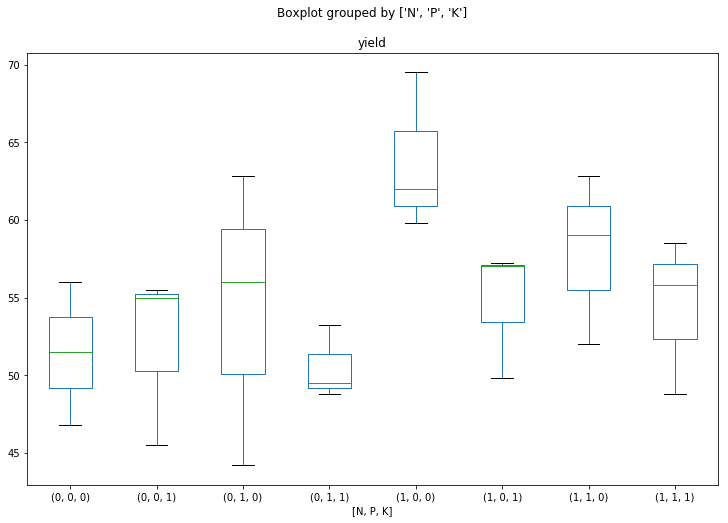

In [25]:
npk.boxplot(["yield"], by=["N","P","K"], grid=False, figsize=(12,8))
plt.show()

In [26]:
swiss = data("swiss")
swiss.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Lausanne,55.7,19.4,26,28,12.11,20.2
Rive Gauche,42.8,27.7,22,29,58.33,19.3
Broye,83.8,70.2,16,7,92.85,23.6
Veveyse,87.1,64.5,14,6,98.61,24.5
Val de Ruz,77.6,37.6,15,7,4.97,20.0


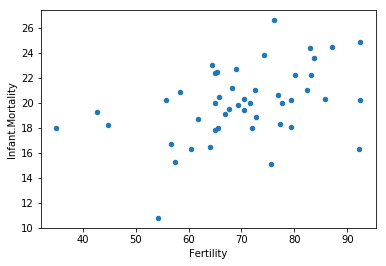

In [27]:
swiss.plot(kind="scatter", x="Fertility", y="Infant.Mortality")

In [28]:
catdom = pd.cut(swiss['Catholic'], [0, 50, 100])
swiss["Catholic_dominance"] = catdom
cat = swiss.groupby("Catholic_dominance")

D:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAA2D2A208>,
      dtype=object)

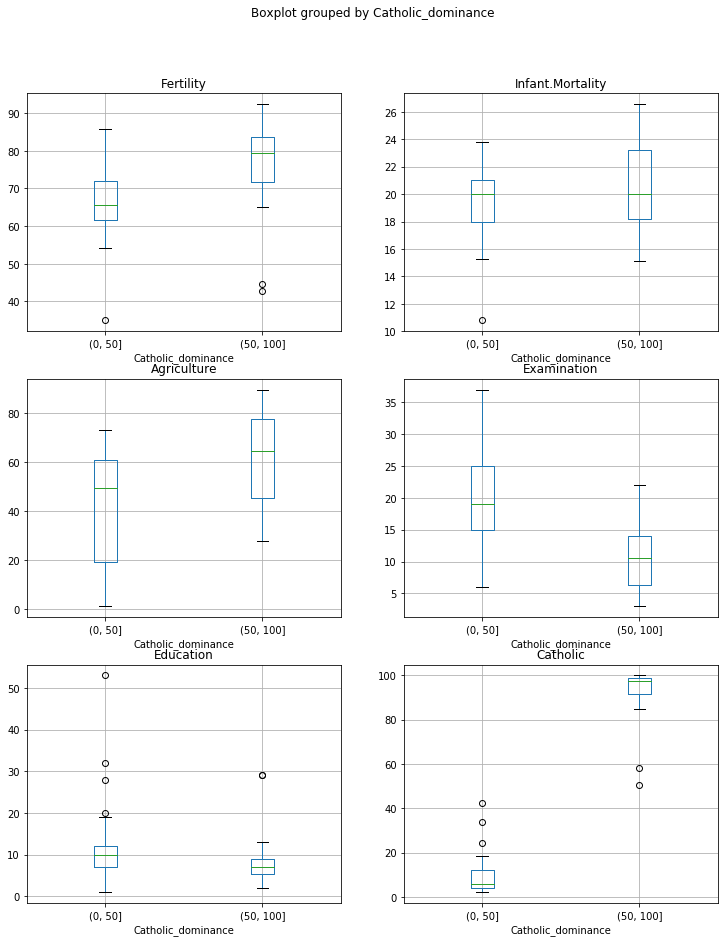

In [29]:
fig, axs = plt.subplots(3,2,figsize=(12,15), sharey=False)
swiss.boxplot(["Fertility", "Infant.Mortality", "Agriculture", "Examination", "Education", "Catholic"], 
              "Catholic_dominance",axs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAA3519128>,
      dtype=object)

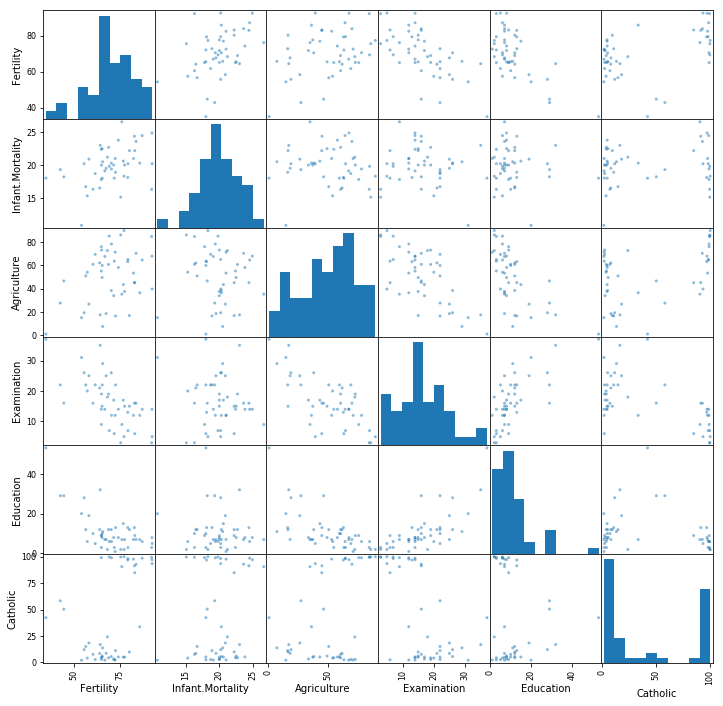

In [30]:
pd.plotting.scatter_matrix(swiss[["Fertility", "Infant.Mortality", "Agriculture", "Examination", "Education", "Catholic"]],
                          figsize = (12,12))